In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import date, time, datetime

In [3]:
datetime.now()

datetime.datetime(2023, 8, 3, 9, 2, 2, 251871)

In [4]:
datetime.now().year

2023

## Strptime
* string parse time
* converts string to datetime

In [5]:
# what if we dont have date object? what if its just text/str?

# strptime --> string, parse, time

datetime.strptime('2022-08-06', '%Y-%m-%d')

datetime.datetime(2022, 8, 6, 0, 0)

In [6]:
dt_B = datetime.strptime('2022-08-06', '%Y-%m-%d')

In [7]:
dt_B.year

2022

In [12]:
# ex -- using strptime codes
try_this = 'jan 20 2090 4pm'

In [13]:
datetime.strptime(try_this, '%b %d %Y %I%p')

datetime.datetime(2090, 1, 20, 16, 0)

## Dateutil

In [15]:
from dateutil import parser

In [16]:
#example - parser automatically converts the text string to a datetime

parser.parse('jan 21st 1990')

datetime.datetime(1990, 1, 21, 0, 0)

## Strftime
* string format time
* takes a date time object and converts to string

In [17]:
# Ex
dt = datetime.now()
dt

datetime.datetime(2023, 8, 3, 9, 23, 41, 151855)

In [22]:
dt.strftime('%y')

'23'

In [25]:
dt.strftime('Year: %Y, Month: %m, Day: %d')

'Year: 2023, Month: 08, Day: 03'

In [26]:
dt.strftime('%c') #--> the %c is a defaulrt output

'Thu Aug  3 09:23:41 2023'

# Numpy datetimes

In [27]:
#ex
np.datetime64('2023-07-31')

numpy.datetime64('2023-07-31')

In [28]:
a = np.datetime64('2023-07-31')
b = np.datetime64(datetime.now())

In [30]:
# we can now perform operations
a+10

numpy.datetime64('2023-08-10')

In [31]:
# now lets look at b
b

numpy.datetime64('2023-08-03T09:31:03.896062')

In [32]:
b+10

numpy.datetime64('2023-08-03T09:31:03.896072')

In [35]:
#this only adds 10 microseconds

# the operations add 10 to the lowest time available in each variable

#to rescale b to day as lowest format

np.datetime64(b, 'D') +10

numpy.datetime64('2023-08-13')

# Pandas Timestamp

In [36]:
# combines the python datetime and the numpy datetime64

In [37]:
pd.Timestamp('4th of July 1776')

Timestamp('1776-07-04 00:00:00')

In [38]:
pd.Timestamp('1776/07/04') #year month day

Timestamp('1776-07-04 00:00:00')

In [39]:
pd.to_datetime('7/4/1776')

Timestamp('1776-07-04 00:00:00')

In [42]:
pdts = pd.to_datetime('4/7/1776', dayfirst=True)
pdts

Timestamp('1776-07-04 00:00:00')

In [43]:
pdts.day_name()

'Thursday'

In [45]:
pdts.days_in_month

31

In [46]:
pdts.week

27

In [51]:
pdts.isocalendar()

datetime.IsoCalendarDate(year=1776, week=27, weekday=4)

# Working with real dataset of oil

In [81]:
oil_path = '/Users/mikewenner/Desktop/CSV/BrentOilPrices.csv'
oil = pd.read_csv(oil_path)
oil

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77
...,...,...
5011,24-Sep-19,64.13
5012,25-Sep-19,62.41
5013,26-Sep-19,62.08
5014,27-Sep-19,62.48


In [82]:
oil.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5016 non-null   object 
 1   Price   5016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 362.6 KB


In [84]:
# note that the date is an object

#cahnge the date column to np datetime

oil['Date'] = oil['Date'].astype(np.datetime64())

# if used the pd.datetime() it errors because pos1 is not the year

In [76]:
oil.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5016 entries, 2000-01-04 to 2019-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5016 non-null   float64
dtypes: float64(1)
memory usage: 78.4 KB


In [60]:
# note change in type of the date as well as the redux in memory

In [61]:
#set the index
oil.set_index('Date', inplace=True)
oil

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


In [62]:
oil.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

# Doing it on the read_csv

In [87]:
# index_col=0 --> will set the index to the column at 0 position
# parse_dates = True

oil2 = pd.read_csv(oil_path, index_col=0, parse_dates=True)
oil2

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


In [65]:
oil2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5016 entries, 2000-01-04 to 2019-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5016 non-null   float64
dtypes: float64(1)
memory usage: 78.4 KB


In [86]:
oil2.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [ ]:
#some other way to read in and assign

# algo_path = Path("algo_returns.csv") # this would be if csv in folder, from pathlib import Path
# algo_df = pd.read_csv(algo_path, parse_dates=True, infer_datetime_format=True)
# algo_df["Date"] = pd.to_datetime(algo_df["Date"])
# algo_df.set_index("Date", inplace=True)
# algo_df.sort_index(inplace=True)
# algo_df.head(10)

In [67]:
# we can now access and slice

In [68]:
#what is price on jan 3 2017?
oil2.loc['2017-01-03']

Price    55.05
Name: 2017-01-03 00:00:00, dtype: float64

In [71]:
# from jan 3 to jan 7?
oil2.loc['2017-01-03':'2017-01-07']

,Price
Date,
2017-01-03,55.05
2017-01-04,54.57
2017-01-05,54.99
2017-01-06,55.90


In [72]:
#select all prices from jan 2019
oil2.loc['2019-01']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


In [73]:
# how about price for first 2 months of 2019?
oil2.loc['2019-01':'2019-02']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


In [74]:
#can also use partial dates
#want all prices up to middle of august in 2019?

oil2.loc['2019-01': '2019-08-15']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
...,...
2019-08-09,57.37
2019-08-12,57.13
2019-08-13,59.90


In [89]:
# create a smaller df with price between dec 1 2015 to mar 31 2016

oil_new = oil2.loc['2015-12-01':'2016-03-31']
oil_new

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


In [90]:
# repeat above using the partial string index

oil_new2 = oil2.loc['2015-12':'2016-03']
oil_new2

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


In [92]:
# can do thia multiple ways

oil2.loc['12/2015':'3/2016']
#oil2.loc['dec 2015':'mar 2016']

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


In [93]:
# whats the standard deviation

oil2.loc['12/2015':'3/2016'].std()

Price    3.990123
dtype: float64

In [94]:
# what is the mean price of feb 2018, was it greater than the mean fromm 

oil2.loc['feb 2018'].mean()

Price    65.3175
dtype: float64

In [95]:
oil2.loc['feb 2018'].mean() > oil2.loc['july 2017'].mean()

Price    True
dtype: bool

## Attribute accessors

In [96]:
oil2.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Date', length=5016)

In [97]:
oil2.index.week

/var/folders/ys/fqvy458x0ds2sdvqh8qgff500000gn/T/ipykernel_30175/654299525.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  oil2.index.week


Int64Index([ 1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
            ...
            38, 38, 38, 38, 39, 39, 39, 39, 39, 40],
           dtype='int64', name='Date', length=5016)

In [98]:
oil2.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='Date', length=5016)

In [99]:
oil2.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday',
       ...
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=5016)

In [100]:
#so can use these to add columns

#what day of the week has the lowest price on average?

oil2['Dayname'] = oil2.index.day_name()
oil2

,Price,Dayname
Date,,
2000-01-04,23.95,Tuesday
2000-01-05,23.72,Wednesday
2000-01-06,23.55,Thursday
2000-01-07,23.35,Friday
2000-01-10,22.77,Monday
...,...,...
2019-09-24,64.13,Tuesday
2019-09-25,62.41,Wednesday
2019-09-26,62.08,Thursday


In [101]:
oil2.groupby('Dayname').mean()

,Price
Dayname,
Friday,64.317988
Monday,63.875348
Thursday,64.581943
Tuesday,64.493895
Wednesday,64.495593


In [102]:
oil2.groupby('Dayname').mean().idxmin()

Price    Monday
dtype: object

In [103]:
oil2.drop(columns=['Dayname'], inplace=True)
oil2

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


## Bool Mask with datetime attributes

In [104]:
# find the average oil price in all leap year februaries

# is_leap_year is an attribute

(oil2.index.is_leap_year == True) & (oil2.index.month == 2)

array([False, False, False, ..., False, False, False])

In [106]:
oil2[(oil2.index.is_leap_year == True) & (oil2.index.month == 2)].mean()

Price    60.696634
dtype: float64

## create date ranges manually

In [107]:
pd.date_range('5/10/2020', '20 june 2020')

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', freq='D')

In [108]:
pd.date_range(start= '1/21/2020', periods=10) #defaults to day

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30'],
              dtype='datetime64[ns]', freq='D')

In [109]:
#can change to week
pd.date_range(start= '1/21/2020', periods=10, freq='w')

DatetimeIndex(['2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16',
               '2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15',
               '2020-03-22', '2020-03-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [110]:
# every other week
pd.date_range(start= '1/21/2020', periods=10, freq='2w')

DatetimeIndex(['2020-01-26', '2020-02-09', '2020-02-23', '2020-03-08',
               '2020-03-22', '2020-04-05', '2020-04-19', '2020-05-03',
               '2020-05-17', '2020-05-31'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [111]:
# the 20 months leading up to jan 2021

pd.date_range(end= 'jan 2021', periods=20, freq='m')

DatetimeIndex(['2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [115]:
# can use these ranges as indicies in creating a df

dti = pd.date_range(end= 'jan 2021', periods=20, freq='m')

pd.DataFrame(index=dti, data=np.random.randint(100, size=(20, 4)), columns=list('abcd'))

# ***the size of 20 MUST equal to 20 in creation of the date range****

,a,b,c,d
2019-05-31,57,48,83,44
2019-06-30,70,73,69,5
2019-07-31,18,51,34,50
2019-08-31,23,27,12,13
2019-09-30,64,74,44,52
2019-10-31,9,58,93,25
2019-11-30,39,38,49,78
2019-12-31,67,46,11,46
2020-01-31,61,5,29,46
2020-02-29,34,48,51,21


In [118]:
# can add an offset timestamp to the datetime index

oil2.index + pd.DateOffset(hours=16)


DatetimeIndex(['2000-01-04 16:00:00', '2000-01-05 16:00:00',
               '2000-01-06 16:00:00', '2000-01-07 16:00:00',
               '2000-01-10 16:00:00', '2000-01-11 16:00:00',
               '2000-01-12 16:00:00', '2000-01-13 16:00:00',
               '2000-01-14 16:00:00', '2000-01-17 16:00:00',
               ...
               '2019-09-17 16:00:00', '2019-09-18 16:00:00',
               '2019-09-19 16:00:00', '2019-09-20 16:00:00',
               '2019-09-23 16:00:00', '2019-09-24 16:00:00',
               '2019-09-25 16:00:00', '2019-09-26 16:00:00',
               '2019-09-27 16:00:00', '2019-09-30 16:00:00'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [119]:
oil2.set_index(oil2.index + pd.DateOffset(hours=16))

,Price
Date,
2000-01-04 16:00:00,23.95
2000-01-05 16:00:00,23.72
2000-01-06 16:00:00,23.55
2000-01-07 16:00:00,23.35
2000-01-10 16:00:00,22.77
...,...
2019-09-24 16:00:00,64.13
2019-09-25 16:00:00,62.41
2019-09-26 16:00:00,62.08


In [120]:
# Timedelta

pd.Timedelta(days=3, hours=4)

Timedelta('3 days 04:00:00')

In [123]:
# can use this to add/subtract to any dates

oil2.iloc[0].name

Timestamp('2000-01-04 00:00:00')

In [125]:
oil2.iloc[0].name + pd.Timedelta(days=3, hours=4)

Timestamp('2000-01-07 04:00:00')

In [126]:
# Dateoffset is calendar aware --> daylight savings!
# Timedelts is absolute time only (day=24hours)

## Resampling TimesSeries
* going from noisy (day) toi month

In [128]:
oil2

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


In [129]:
oil2.resample('M')

In [130]:
# How will the daily collapse into monthly? --> need to agg .. like groupby

oil2.resample('M').median()

#so this takes all the monthly data for each month and calcs the median (most occurred)

,Price
Date,
2000-01-31,26.080
2000-02-29,27.610
2000-03-31,27.970
2000-04-30,22.900
2000-05-31,28.260
...,...
2019-05-31,71.785
2019-06-30,63.560
2019-07-31,63.670


In [132]:
%matplotlib inline

<AxesSubplot: xlabel='Date'>

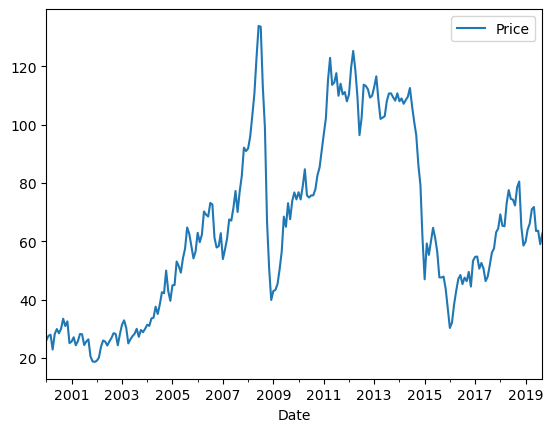

In [134]:
oil2.resample('M').median().plot()

<AxesSubplot: xlabel='Date'>

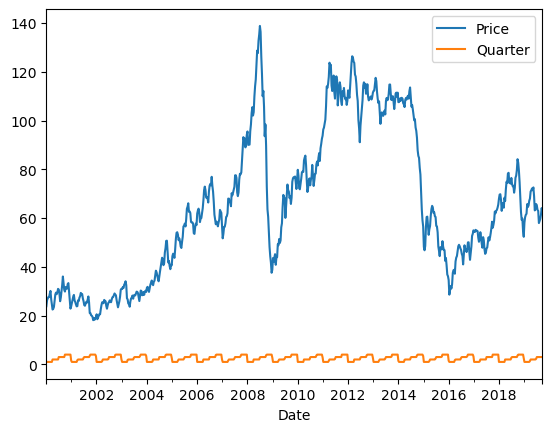

In [160]:
# look at a 10Day mean
oil2.resample('10D').mean().plot()

## Upsampling Timeseries
* going from a few obs to many obs
* interploation for creating new data points

In [136]:
#ex resample down to 8H from daily data using linear interpolation

oil2.resample('8H').interpolate(method='linear')

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.873333
2000-01-04 16:00:00,23.796667
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.663333
...,...
2019-09-28 16:00:00,61.652222
2019-09-29 00:00:00,61.486667
2019-09-29 08:00:00,61.321111


# Challenge Exercise

In [138]:
# add a new col to oil df that contains the quarter
oil2.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [142]:
oil2.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Date', length=5016)

In [143]:
oil2['Quarter'] = oil2.index.quarter
oil2

,Price,Quarter
Date,,
2000-01-04,23.95,1
2000-01-05,23.72,1
2000-01-06,23.55,1
2000-01-07,23.35,1
2000-01-10,22.77,1
...,...,...
2019-09-24,64.13,3
2019-09-25,62.41,3
2019-09-26,62.08,3


In [144]:
oil2.sample(10)

,Price,Quarter
Date,,
2000-10-24,31.81,4
2008-09-04,103.41,3
2019-07-10,66.41,3
2005-04-11,51.21,2
2000-10-31,30.15,4
2006-04-06,67.58,2
2001-04-10,25.64,2
2010-02-23,76.44,1
2001-08-27,26.22,3


In [146]:
# using the quarter column and groupby, find the avg and stdev for each quarter for 2014
oil2.loc['2014']

,Price,Quarter
Date,,
2014-01-02,107.94,1
2014-01-03,106.57,1
2014-01-06,106.71,1
2014-01-07,107.01,1
2014-01-08,107.42,1
...,...,...
2014-12-24,58.67,4
2014-12-26,58.72,4
2014-12-29,57.86,4


In [152]:
oil2.loc['2014'].groupby('Quarter').agg(['mean', 'std'])

Price           
               mean        std
Quarter                       
1        108.141935   1.280641
2        109.694063   2.406442
3        101.899844   4.364868
4         76.429219  11.410171

In [155]:
oil2.loc['2014'].groupby('Quarter').describe().T

Quarter               1           2           3          4
Price count   62.000000   64.000000   64.000000  64.000000
      mean   108.141935  109.694063  101.899844  76.429219
      std      1.280641    2.406442    4.364868  11.410171
      min    105.730000  103.370000   94.530000  55.270000
      25%    107.017500  108.467500   99.047500  65.992500
      50%    108.150000  109.505000  101.180000  79.410000
      75%    109.140000  110.852500  105.772500  85.517500
      max    111.260000  115.190000  110.840000  94.570000

In [156]:
# repeat assuming that the quarter column doesnt exist

oil2.loc['2014'].resample('Q')

In [158]:
oil2.loc['2014', 'Price'].resample('Q').agg(['mean', 'std'])

,mean,std
Date,,
2014-03-31,108.141935,1.280641
2014-06-30,109.694063,2.406442
2014-09-30,101.899844,4.364868
2014-12-31,76.429219,11.410171


In [161]:
from IPython.display import FileLink

In [163]:
oil2.to_csv('oil.csv', index=True)

FileLink('oil.csv')

/Users/mikewenner/Desktop/Data_Science/pd_course/oil.csv

In [164]:
oil.to_csv('/Users/mikewenner/Desktop/oil.csv')